<div style="text-align: left; background-color:#E9F7EF; font-family:Arial; color:#526085; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 58px;border-style: solid;border-color: dark green;">ĐỒ ÁN THỰC HÀNH</div>
<div style="text-align: left; background-color:#fadefc; font-family: Arial; color:#551184; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 18px">| Bộ môn: Python Cho Khoa Học Dữ Liệu |</div>

# <div style="text-align: left; background-color:#0C6A86; font-family:Arial; color:white; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 30px;border-style: solid;border-color: black;">PHẦN 2. MÔ HÌNH HÓA DỮ LIỆU</div>

<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
    <h3 style="text-align: left; background-color: #ACA224; font-family:newtimeroman; color: white; padding: 14px; line-height: 1; border-radius:10px"><b>Mục lục 📝</b></h3>
    
   * [I. Bài toán đặt ra:](#1)
        
   * [II. Tiền xử lý dữ liệu](#2)
        - [1. Loại những thuộc tính không có ý nghĩa cho việc mô hình hóa](#2.1)
        - [2. Drop những cột giá trị ](#2.2)
        - [2. Chuyển đổi các cột không phải dạng số về dạng số](#2.2)
        - [3. Tính correlations và tiếp tục chọn những thuộc tính thật sự có giá trị](#2.3)
        - [4. Xử lý các giá trị NaN](#2.4)

   * [III. Xây dựng mô hình học máy](#3)
        - [1. Random Forest](#3.1)
        - [2. Logistic Regression](#3.2)
        - [3. Decision Tree](#3.3)
        - [4. Đánh giá mô hình (Evaluation)](#3.4)
        - [5. Tổng kết](#3.5)

<a id="1"></a>
## <div style="text-align: left; background-color:#ACA224; font-family:newtimeroman;color: white; padding: 14px; line-height: 1;border-radius:10px">I. Bài toán đặt ra</div>

 **<span style='color:#2B9C15'>💬 Tên bài toán </span>** 
Dự đoán mức độ nghiêm trọng của vụ tai nạn với tập dữ liệu Canada Accident

 
 **<span style='color:#2B9C15'>💬 Giới thiệu chung </span>**


<a id="2"></a>
## <div style="text-align: left; background-color:#ACA224; font-family:newtimeroman;color: white; padding: 14px; line-height: 1;border-radius:10px">II. Tiền xử lý dữ liệu</div>

👉 Trước tên ta cần import và cài đặt một số thư viện cần thiết.

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from dateutil import parser
import sklearn
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
sns.set_theme(palette='deep')
%matplotlib inline

👉 Tiếp đến đọc file `afterPreprocess` (file đã được tiền xử lý ở phần Khám phá dữ liệu) vào dataframe `accident_df` và in ra 3 dòng đầu tiên của dataframe.

In [59]:
df = pd.read_csv("./afterPreprocess.csv")
df.head()

,Unnamed: 0,Accident Date,Time (24hr),Road Surface,Weather Conditions,Type of Vehicle,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty
0,0,2014-01-01,14:15:00,Dry,Fine without high winds,Car,Passenger,Slight,Male,28
1,1,2014-01-01,00:05:00,Dry,Fine without high winds,Car,Passenger,Slight,Male,29
2,2,2014-01-01,02:20:00,Dry,Fine without high winds,Car,Driver,Slight,Female,21
3,3,2014-01-01,01:30:00,Wet/Damp,Fine without high winds,Car,Pedestrian,Serious,Female,34
4,4,2014-01-01,14:15:00,Dry,Fine without high winds,Car,Driver,Slight,Male,34


### <span style='color:#2B9C15'>Những yếu tố ảnh hưởng đến mức độ nghiêm trọng của vụ tai nạn - Trực quan hoá</span>

Text(0.5, 1.0, 'Thống kê Loại xe ảnh hưởng đến mức độ nghiêm trọng của vụ tai nạn')

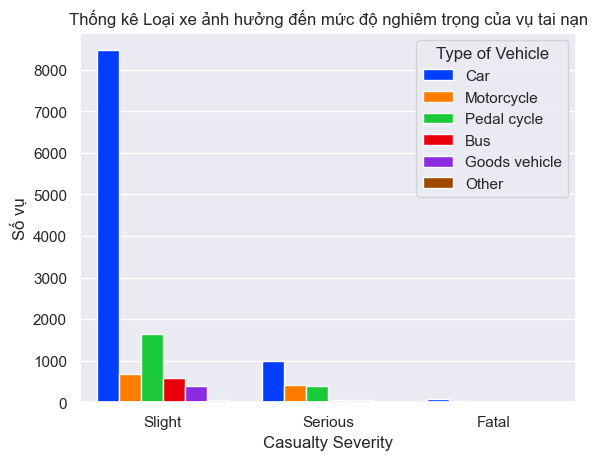

In [60]:
sns.countplot(data = df, x = df['Casualty Severity'], hue = 'Type of Vehicle', palette='bright', saturation=9)
plt.ylabel("Số vụ")
plt.title("Thống kê Loại xe ảnh hưởng đến mức độ nghiêm trọng của vụ tai nạn")

In [61]:
for severity in set(df['Casualty Severity']):
      print("==============================" ,severity, '==============================')
      print(df[df['Casualty Severity'] == severity]['Weather Conditions'].value_counts())

============================== Serious ==============================
Fine without high winds       1638
Raining without high winds     188
Raining with high winds         24
Unknown                         22
Fine with high winds            15
Other                           14
Snowing without high winds       5
Snowing with high winds          1
Fog or mist (if hazard)          1
Name: Weather Conditions, dtype: int64
============================== Fatal ==============================
Fine without high winds       91
Raining without high winds    10
Raining with high winds        4
Fine with high winds           3
Fog or mist (if hazard)        2
Other                          1
Name: Weather Conditions, dtype: int64
============================== Slight ==============================
Fine without high winds       10043
Raining without high winds     1072
Unknown                         268
Raining with high winds         166
Fine with high winds            134
Other                 

Text(0.5, 1.0, 'Thống kê điều kiện thời tiết ảnh hưởng đến mức độ nghiêm trọng của vụ tai nạn')

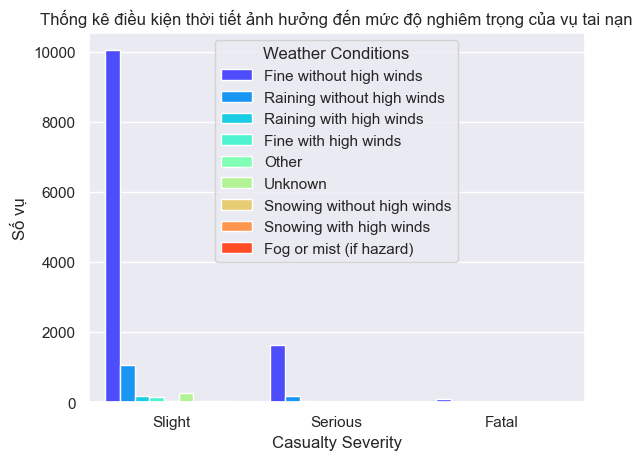

In [62]:
sns.countplot(data = df, x = df['Casualty Severity'], hue = 'Weather Conditions', palette='rainbow', saturation=9)
plt.ylabel("Số vụ")
plt.title("Thống kê điều kiện thời tiết ảnh hưởng đến mức độ nghiêm trọng của vụ tai nạn")

Text(0.5, 1.0, 'Thống kê tình trạng mặt đường ảnh hưởng đến mức độ nghiêm trọng của vụ tai nạn')

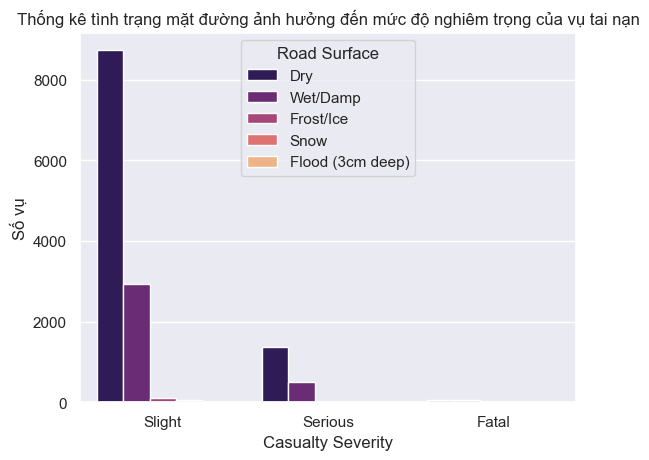

In [63]:
sns.countplot(data = df, x = df['Casualty Severity'], hue = 'Road Surface', palette='magma')
plt.ylabel("Số vụ")
plt.title("Thống kê tình trạng mặt đường ảnh hưởng đến mức độ nghiêm trọng của vụ tai nạn")

Text(0.5, 1.0, 'Thống kê mức độ nghiêm trọng của các đối tượng trong vụ tai nạn')

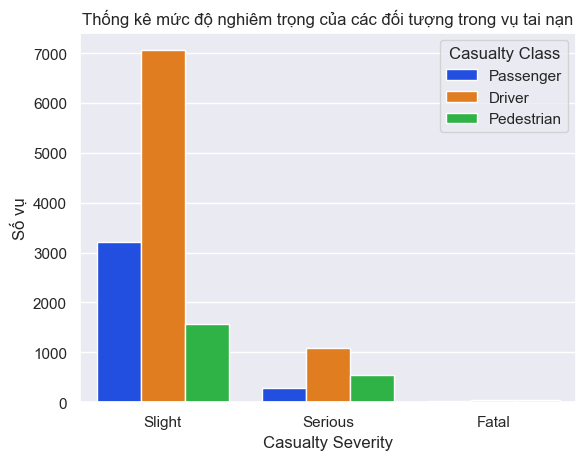

In [64]:
sns.countplot(data = df, x = df['Casualty Severity'], hue = 'Casualty Class', palette='bright')
plt.ylabel("Số vụ")
plt.title("Thống kê mức độ nghiêm trọng của các đối tượng trong vụ tai nạn")

### <span style='color:#2B9C15'>Đưa dữ liệu Accident Date và Time về kiểu dữ liệu phù hợp để dễ phân tích</span>


In [65]:
# for i in range(len(df.index)):
#       df["Accident Date"] = pd.to_datetime(df["Accident Date"], format='%Y-%m-%d')
#       df['Time (24hr)'] = pd.to_datetime(df['Time (24hr)'], format='%H:%M:%S')

👉 Không nên dùng hàm to_datetime của thư viện pandas hoặc gán lại kiểu dữ liệu cho từng dữ liệu vì sẽ gây mất thời gian thực hiện. Nên đưa vào trong một list mới bằng strptime của datetime hoặc parser.parse của thư viện dateutil 

👉 Để run cell trên thì phải mất đến hơn 5 phút

In [66]:
dt = []
time = []
for i in range(len(df.index)):
      dt.append(datetime.strptime(df["Accident Date"][i], '%Y-%m-%d').date())
      time.append(datetime.strptime(df["Time (24hr)"][i], '%H:%M:%S').time())

### <span style='color:#2B9C15'>Chuyển đổi các cột không phải dạng số về dạng số </span>

Chuyển các cột `Accident Date`, `Time (24hr)`, ... về dạng số để làm đầu vào cho machine learning model, tuy nhiên các cột có dạng số ngày vẫn mang ý nghĩa phân loại

In [67]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
df[['Road Surface', 'Weather Conditions', 'Type of Vehicle', 'Casualty Class', 'Casualty Severity', 'Sex of Casualty']] = enc.fit_transform(df[['Road Surface', 'Weather Conditions', 'Type of Vehicle', 'Casualty Class', 'Casualty Severity', 'Sex of Casualty']])
df[:4]

,Unnamed: 0,Accident Date,Time (24hr),Road Surface,Weather Conditions,Type of Vehicle,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty
0,0,2014-01-01,14:15:00,0.0,1.0,1.0,1.0,2.0,1.0,28
1,1,2014-01-01,00:05:00,0.0,1.0,1.0,1.0,2.0,1.0,29
2,2,2014-01-01,02:20:00,0.0,1.0,1.0,0.0,2.0,0.0,21
3,3,2014-01-01,01:30:00,4.0,1.0,1.0,2.0,1.0,0.0,34


### <span style='color:#2B9C15'>Encoding</span>

In [68]:
def onehot_encode(df, columns, prefixes):
	df = df.copy()
	for column, prefix in zip(columns, prefixes):
		dummies = pd.get_dummies(df[column], prefix=prefix)
		df = pd.concat([df, dummies], axis=1)
		df = df.drop(column, axis=1)
	return df

In [69]:
{column: len(df[column].unique()) for column in df.columns if df.dtypes[column] == 'object'}

{'Accident Date': 2151, 'Time (24hr)': 1230}

### <span style='color:#2B9C15'>Tính Correlations và tiếp tục chọn những thuộc tính thật sự có giá trị</span>

In [70]:
# Quan sát số lượng null ở các thuộc tính attribute
df.isnull().sum()

Unnamed: 0            0
Accident Date         0
Time (24hr)           0
Road Surface          0
Weather Conditions    0
Type of Vehicle       0
Casualty Class        0
Casualty Severity     0
Sex of Casualty       0
Age of Casualty       0
dtype: int64

**Như đã đề cập ở phần 1: Sau khi hoàn thành chuyển đổi hết các thuộc tính về dạng số, tiến hành tính correlations giữa từng thuộc tính và biến đầu ra:**
- Correlation là một thuật ngữ thống kê được sử dụng phổ biến đề cập đến mức độ liên quan của hai biến để có mối quan hệ tuyến tính với nhau hay không.
- Correlation cao nhất có giá trị là 1 (hai biến hoàn toàn có quan hệ tuyến tính) và thấp nhất dần nếu hai biến càng không có quan hệ tuyến tính.
- Nhóm sẽ tạo một dataframe tên là 'correlations' chứa các correlations của từng cột trong bộ dữ liệu để dễ dàng nhận xét mức độ tương quan giữa các biến.

In [71]:
correlations = pd.DataFrame(df, columns=['Road Surface', 'Weather Conditions', 'Type of Vehicle', 'Casualty Class', 'Casualty Severity', 'Sex of Casualty', 'Age of Casualty']).corr()

In [72]:
correlations

,Road Surface,Weather Conditions,Type of Vehicle,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty
Road Surface,1.000000,0.431936,-0.059775,-0.012286,-0.027223,0.017328,-0.007414
Weather Conditions,0.431936,1.000000,-0.025608,0.005297,0.013418,-0.001069,-0.015945
Type of Vehicle,-0.059775,-0.025608,1.000000,-0.298771,-0.117776,0.262030,-0.047104
Casualty Class,-0.012286,0.005297,-0.298771,1.000000,-0.096125,-0.156407,-0.116148
Casualty Severity,-0.027223,0.013418,-0.117776,-0.096125,1.000000,-0.105963,-0.053902
Sex of Casualty,0.017328,-0.001069,0.262030,-0.156407,-0.105963,1.000000,-0.060023
Age of Casualty,-0.007414,-0.015945,-0.047104,-0.116148,-0.053902,-0.060023,1.000000


<AxesSubplot:>

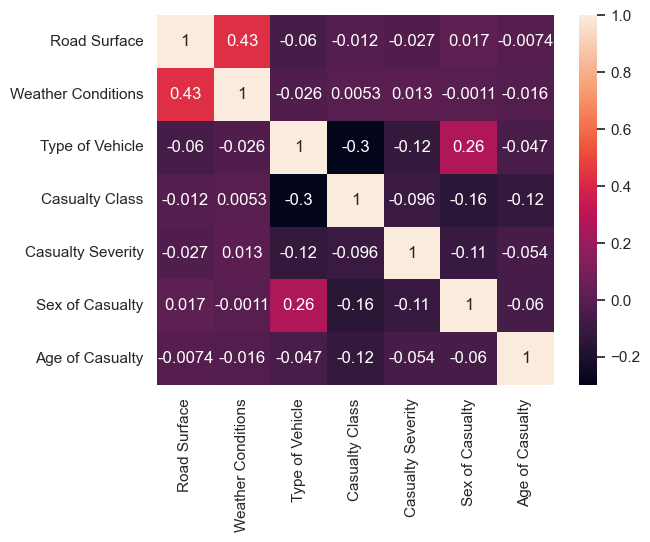

In [73]:
sns.heatmap(correlations, annot=True) # vẽ heatmap thể hiện các correlation

<a id="3"></a>
## <div style="text-align: left; background-color:#ACA224; font-family:newtimeroman;color: white; padding: 14px; line-height: 1;border-radius:10px">III. Xây dưng mô hình học máy </div>

## *🤔 <span style='color:#2B9C15'> Làm sao để áp dụng Machine Learning vào bài toán?</span>*


### <span style = 'color:#2B9C15'> **Import các thư viện cần thiết**

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import log_loss
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

### <span style = 'color:#2B9C15'> **Chia data thành 2 tập training data và test data**

👉 Đưa ra những features nào làm dữ liệu để dự đoán cho thuật toán Machine Learning.

- Mục đích: Bất cứ khi nào chúng ta đào tạo một mô hình học máy, chúng ta không thể đào tạo mô hình đó trên một tập dữ liệu hoặc thậm chí chúng ta đào tạo nó trên một tập dữ liệu duy nhất thì chúng ta sẽ không thể đánh giá hiệu suất của mô hình của mình do tập dữ liệu đã được mô hình học thuộc lòng thì việc đánh giá sẽ luôn đạt tỉ lệ đúng rất cao và có thể lên đến 100% dẫn đến hiện tượng over fitting - Không tổng quát khi áp dụng vào dữ liệu thực tế.
- Ví dụ dễ hiểu là nếu bạn giải đề thi toán và được giáo viên cho một bộ các câu hỏi có thể ra thi, nếu bạn đã ôn rất kĩ những câu hỏi đó đến mức nhớ cách giải rõ ràng cho từng câu hỏi và sau đó khi đến ngày thi nếu giáo viên ra đề thi với các câu hỏi giống như trong bộ đề bạn đã ôn thì chắc chắn khả năng rất cao bạn sẽ được 10đ, do đó giáo viên không đánh giá chính xác nhất được khả năng tư duy giải toán hay hiểu vấn đề của học sinh mà chỉ đơn thuần là học thuộc lòng cách giải của từng câu hỏi. Giải pháp hiệu quả hơn cho việc đánh giá sẽ là phân chia bộ các câu hỏi ban đầu ra thành 2 phần là bộ câu hỏi cho học sinh ôn tập và bộ câu hỏi để ra đề thi khi đó buộc học sinh phải vận dụng, am hiểu những kiến thức trong quá trình ôn luyện vào giải đề thi. 
- Vì lý do đó, chúng ta chia dữ liệu nguồn của mình thành 2 tập training set và test set, nhiều bài viết cũng đề cập đến việc chia thành 3 tập là training, validation, và test set nhưng trong bài làm này nhóm sẽ chỉ chia thành 2 tập training và tets set.
- Kích thước mỗi tập như sau:
    + Size of Training set = 80% * (Size of Dataset).
    + Size of Test set = 20% * (Size of Dataset).

In [75]:
accident_ml = df.drop('Casualty Severity' ,axis=1)
accident_ml.head()
# accident_ml['Accident Date'] = dt
# accident_ml['Time (24hr)'] = time

,Unnamed: 0,Accident Date,Time (24hr),Road Surface,Weather Conditions,Type of Vehicle,Casualty Class,Sex of Casualty,Age of Casualty
0,0,2014-01-01,14:15:00,0.0,1.0,1.0,1.0,1.0,28
1,1,2014-01-01,00:05:00,0.0,1.0,1.0,1.0,1.0,29
2,2,2014-01-01,02:20:00,0.0,1.0,1.0,0.0,0.0,21
3,3,2014-01-01,01:30:00,4.0,1.0,1.0,2.0,0.0,34
4,4,2014-01-01,14:15:00,0.0,1.0,1.0,0.0,1.0,34


In [76]:
accident_ml = accident_ml[['Road Surface', 'Weather Conditions', 'Age of Casualty', 'Sex of Casualty' ]]
# Split the data into a training and test set.
np.random.seed(16)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(accident_ml.values, df['Casualty Severity'].values,test_size=0.20, random_state=99)


In [77]:
print(len(X_train),len(y_train))

11071 11071


In [88]:
X_train[:5, :]

array([[ 0.,  8., 17.,  1.],
       [ 0.,  1., 45.,  1.],
       [ 0.,  1., 26.,  1.],
       [ 0.,  1., 41.,  0.],
       [ 0.,  1., 48.,  1.]])

In [89]:
print(len(X_test), len(y_test))

2768 2768


In [90]:
print(X_train.shape)
print(y_train.shape)

(11071, 4)
(11071,)


### <span style = 'color:#2B9C15'> **Chuẩn hoá dữ liệu (Normalize the Data)**

c:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 640x480 with 0 Axes>

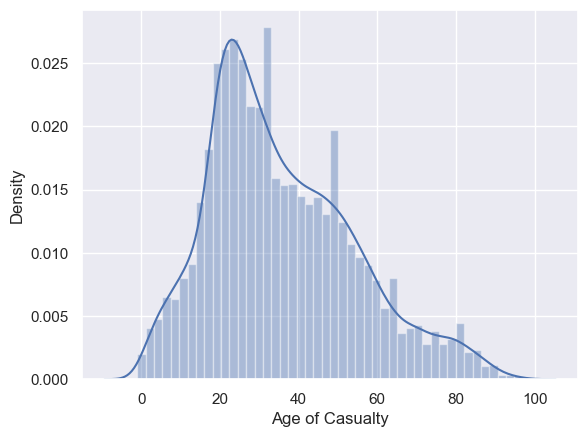

<Figure size 640x480 with 0 Axes>

In [78]:
sns.distplot(accident_ml['Age of Casualty'])
plt.figure()

### <span style = 'color:#2B9C15'> **1. RANDOM FOREST**
👉 Random Forest là một supervised learning algorithm, sử dụng trong cả bài toán phân loại classification cũng như hồi quy regression. 

👉 Nhiệm vụ là tạo ra những Decision Trees cho những mẫu data và sau đó là dự đoán từ chúng và cuối cùng là lựa chọn ra solution tốt nhất.  

In [79]:
random_forest = RandomForestClassifier(n_estimators=200)
random_forest.fit(X_train,y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_test, y_test)
acc_random_forest1 = round(random_forest.score(X_test, y_test) * 100, 2)

sk_report = classification_report(
	digits=6,
	y_true=y_test, 
	y_pred=Y_pred)
print("Accuracy" , acc_random_forest1)
print(sk_report)
pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 84.18
              precision    recall  f1-score   support

         0.0   0.000000  0.000000  0.000000        27
         1.0   0.200000  0.015267  0.028369       393
         2.0   0.848795  0.989779  0.913881      2348

    accuracy                       0.841763      2768
   macro avg   0.349598  0.335015  0.314083      2768
weighted avg   0.748400  0.841763  0.779242      2768



c:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Predicted,1.0,2.0,All
Actual,,,
0.0,0,27,27
1.0,6,387,393
2.0,24,2324,2348
All,30,2738,2768


### <span style = 'color:#2B9C15'> **2. LOGISTIC REGRESSION**
👉 Logistic Regression được sử dụng cho những classification problems. Dựa trên xác suất mà có thể phân tích dự đoán.

👉 Có 2 loại chính:
* Binary classification
* Multi-class classification

In [80]:
lr = LogisticRegression()
# Fit the model on the trainng data.
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
sk_report = classification_report(
	digits=6,
	y_true=y_test, 
	y_pred=y_pred)
print("Accuracy", round(accuracy_score(y_pred, y_test)*100,2))
print(sk_report)
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 84.83
              precision    recall  f1-score   support

         0.0   0.000000  0.000000  0.000000        27
         1.0   0.000000  0.000000  0.000000       393
         2.0   0.848266  1.000000  0.917905      2348

    accuracy                       0.848266      2768
   macro avg   0.282755  0.333333  0.305968      2768
weighted avg   0.719555  0.848266  0.778627      2768



c:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in l

Predicted,2.0,All
Actual,,
0.0,27,27
1.0,393,393
2.0,2348,2348
All,2768,2768


### <span style = 'color:#2B9C15'> **3. DECISION TREE**

In [81]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree1 = round(decision_tree.score(X_test, y_test) * 100, 2)
sk_report = classification_report(
	digits=6,
	y_true=y_test, 
	y_pred=Y_pred)
print("Accuracy", acc_decision_tree1)
print(sk_report)
### Confusion Matrix 
pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 83.71
              precision    recall  f1-score   support

         0.0   0.000000  0.000000  0.000000        27
         1.0   0.211538  0.027990  0.049438       393
         2.0   0.849668  0.982112  0.911102      2348

    accuracy                       0.837066      2768
   macro avg   0.353736  0.336701  0.320180      2768
weighted avg   0.750779  0.837066  0.779876      2768



Predicted,0.0,1.0,2.0,All
Actual,,,,
0.0,0,1,26,27
1.0,0,11,382,393
2.0,2,40,2306,2348
All,2,52,2714,2768


👉 Nếu nhìn kĩ vào confusion matrix, chúng ta thấy thuật toán ... làm tốt hơn 2 thuật toán còn lại. Nó dự đoán tình trạng nghiêm trọng của vụ tai nạn là true positive.
Accuracy score thấp hơn so với thuật toán khác vì thuật toán khác dự đoán phần lớn tai nạn nhẹ và những con số đó thực sự cao trong bộ dữ liệu

👉 Confusion matrix giúp chúng ta hiểu được thuật toán thực sự hoạt động tốt hơn về mặt xem xét tất cả các dự đoán khác nhau của mỗi lớp.

## <span style = 'color:#2B9C15'> **Điều chỉnh những hyperparameters cho models**
### 👉 **Logistic Regression with Hyperparameter tuning**

In [82]:
from sklearn.linear_model import LogisticRegressionCV
lr = LogisticRegressionCV(cv=3, random_state=0,multi_class='multinomial')
# Fit the model on the trainng data.
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
sk_report = classification_report(
	digits=6,
	y_true=y_test, 
	y_pred=y_pred)
print("Accuracy", round(accuracy_score(y_pred, y_test)*100,2))
print(sk_report)
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

c:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Accuracy 84.83
              precision    recall  f1-score   support

         0.0   0.000000  0.000000  0.000000        27
         1.0   0.000000  0.000000  0.000000       393
         2.0   0.848266  1.000000  0.917905      2348

    accuracy                       0.848266      2768
   macro avg   0.282755  0.333333  0.305968      2768
weighted avg   0.719555  0.848266  0.778627      2768



c:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Predicted,2.0,All
Actual,,
0.0,27,27
1.0,393,393
2.0,2348,2348
All,2768,2768


### **👉 Decision Tree with Hyperparameter tuning**

In [83]:
decision_tree = DecisionTreeClassifier(min_samples_leaf=12, max_features=4)
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree1 = round(decision_tree.score(X_test, y_test) * 100, 2)
sk_report = classification_report(
	digits=6,
	y_true=y_test, 
	y_pred=Y_pred)
print("Accuracy", acc_decision_tree1)
print(sk_report)
### Confusion Matrix 
pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 84.72
              precision    recall  f1-score   support

         0.0   0.000000  0.000000  0.000000        27
         1.0   0.200000  0.002545  0.005025       393
         2.0   0.848353  0.998296  0.917237      2348

    accuracy                       0.847182      2768
   macro avg   0.349451  0.333614  0.307421      2768
weighted avg   0.748025  0.847182  0.778775      2768



c:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Predicted,1.0,2.0,All
Actual,,,
0.0,0,27,27
1.0,1,392,393
2.0,4,2344,2348
All,5,2763,2768


### **👉 Random Forest Hyperparameter tuning**
📖Đầu tiên, chúng ta sẽ xem những paramters mặc định của mô hình random forest trước khi điều chỉnh các thông số đấy

In [84]:
random_forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

**📖Thực hiện grid search sử dụng thư viện sklearn**

In [85]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
	'bootstrap': [True],
	'max_depth': [80, 90, 100, 110],
	'max_features': [4, 5],
	'min_samples_leaf': [5, 10, 15],
	'min_samples_split': [8, 10, 12],
	'n_estimators': [100, 200, 300]
}
# Create a based model
random_f = RandomForestClassifier()
# Instantiate the grid search model
grid_search = RandomizedSearchCV(estimator = random_f, param_distributions = param_grid, 
				cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


c:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "c:\Users\Admin\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\Users\Admin\anaconda3\lib\site-packages\jo

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [80, 90, 100, 110],
                                        'max_features': [4, 5],
                                        'min_samples_leaf': [5, 10, 15],
                                        'min_samples_split': [8, 10, 12],
                                        'n_estimators': [100, 200, 300]},
                   verbose=2)

## <span style = 'color:#2B9C15'> Feature Importance

👉 Nhóm đã sử dụng thư viện Random Forest của Sklearn để tìm ra features quan trọng nhất.

👉 Nhóm sẽ biểu diễn bằng biểu đồ để có thể biết được features nào là quan trọng nhất để dự đoán casualty severity

<AxesSubplot:>

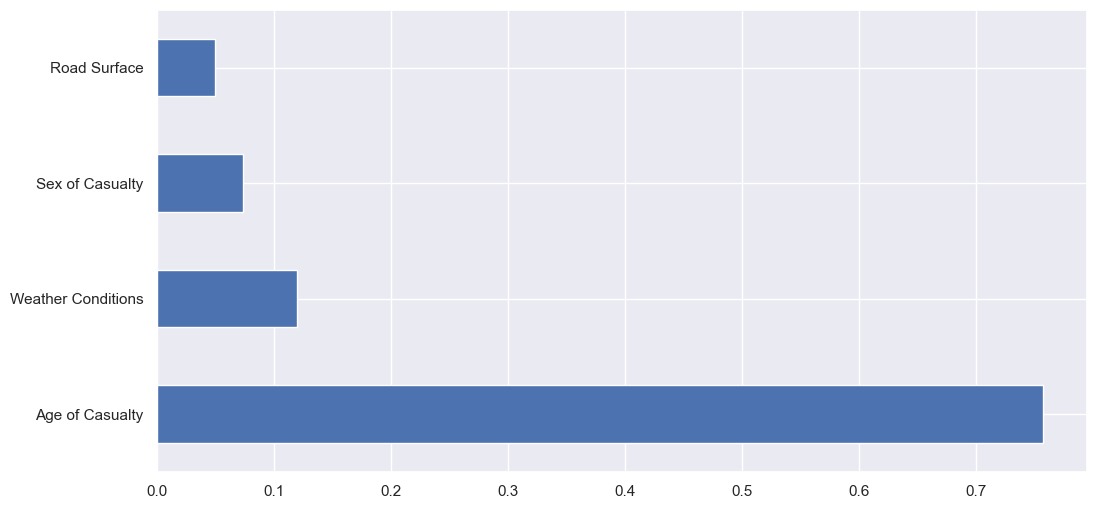

In [99]:
plt.figure(figsize=(12,6))
feat_importances = pd.Series(random_forest.feature_importances_, index=accident_ml.columns)
feat_importances.nlargest(5).plot(kind='barh')

In [87]:
Y_pred = grid_search.predict(X_test)
acc_random_forest1 = round(grid_search.score(X_test, y_test) * 100, 2)

sk_report = classification_report(
	digits=6,
	y_true=y_test, 
	y_pred=Y_pred)
print("Accuracy" , acc_random_forest1)
print(sk_report)
pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 84.83
              precision    recall  f1-score   support

         0.0   0.000000  0.000000  0.000000        27
         1.0   0.000000  0.000000  0.000000       393
         2.0   0.848266  1.000000  0.917905      2348

    accuracy                       0.848266      2768
   macro avg   0.282755  0.333333  0.305968      2768
weighted avg   0.719555  0.848266  0.778627      2768



c:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Predicted,2.0,All
Actual,,
0.0,27,27
1.0,393,393
2.0,2348,2348
All,2768,2768


Random Forest tốn nhiều thời gian để điều chỉnh hyperparameter. Hầu hết các thuật toán làm việc tốt với những giá trị mặc định ngoại trừ decision tree.

## <span style = 'color:#2B9C15'> **Conclusion**
Nhóm đã thực hiện các thuật toán Logistic Regression, Decision Tree và Random Forest để dự đoán mức độ nghiêm trọng của vụ tai nạn. Kết luận như sau:
* Vì nhóm đã thử ba thuật toán khác nhau để dự đoán mức độ nghiêm trọng của tai nạn. Rõ ràng là Decision Tree và Random Forest đã thức hiện tốt hơn nhiều về việc dự đoán mực độ nghiêm trọng của vụ tai nạn. Hồi quy logistic có độ chính xác tốt hơn nhưng nó không có nghĩa là nó đã làm tốt hơn các thuật toán khác.

<div style="text-align: left; background-color:#0C6A86; font-family:Arial; color:white; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 30px;border-style: solid;border-color: black;">KẾT THÚC PHẦN MODELING</div>
<div style="text-align: left; background-color:#fadefc; font-family: Arial; color:#551184; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 18px"> 😀Thank you for watching😀 </div>